In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_df = pd.read_csv('letter-recognition.csv')
data_df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
xbox,20000.0,4.02355,1.913212,0.0,3.0,4.0,5.0,15.0
ybox,20000.0,7.03550,3.304555,0.0,5.0,7.0,9.0,15.0
width,20000.0,5.12185,2.014573,0.0,4.0,5.0,6.0,15.0
height,20000.0,5.37245,2.261390,0.0,4.0,6.0,7.0,15.0
onpix,20000.0,3.50585,2.190458,0.0,2.0,3.0,5.0,15.0
xbar,20000.0,6.89760,2.026035,0.0,6.0,7.0,8.0,15.0
ybar,20000.0,7.50045,2.325354,0.0,6.0,7.0,9.0,15.0
x2bar,20000.0,4.62860,2.699968,0.0,3.0,4.0,6.0,15.0
y2bar,20000.0,5.17865,2.380823,0.0,4.0,5.0,7.0,15.0
xybar,20000.0,8.28205,2.488475,0.0,7.0,8.0,10.0,15.0


In [5]:
data_df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [6]:
transposed_df = data_df.transpose()
transposed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
letter,T,I,D,N,G,S,B,A,J,M,...,W,O,E,J,T,D,C,T,S,A
xbox,2,5,4,7,2,4,4,1,2,11,...,3,4,4,2,5,2,7,6,2,4
ybox,8,12,11,11,1,11,2,1,2,15,...,8,3,9,11,8,2,10,9,3,9
width,3,3,6,6,3,5,5,3,4,13,...,5,5,5,3,7,3,8,6,4,6
height,5,7,8,6,1,8,4,2,4,9,...,6,4,6,8,7,3,8,7,2,6


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [8]:
X = data_df.iloc[:, 1:].values
y = data_df['letter'].values

In [9]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = tf.keras.utils.to_categorical(y_encoded)
y_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [10]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized


array([[-1.0576983 ,  0.29187713, -1.05327668, ..., -0.21908163,
        -1.4381527 ,  0.12291107],
       [ 0.51038497,  1.5023577 , -1.05327668, ..., -0.21908163,
         0.12008142,  1.35944092],
       [-0.01230945,  1.19973756,  0.43590966, ..., -0.8656262 ,
        -0.26947711,  0.74117599],
       ...,
       [ 1.03307939,  0.59449727,  0.43590966, ...,  2.36709667,
        -0.65903564, -2.35014863],
       [-1.0576983 , -1.22122359, -0.55688123, ...,  0.42746295,
         0.50963994,  0.12291107],
       [-0.01230945,  0.59449727,  0.43590966, ..., -0.8656262 ,
        -0.65903564,  0.12291107]])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_onehot, test_size=0.2, random_state=42)
input_dim = X_train.shape[1]
output_dim = y_train.shape[1]

In [12]:
model = tf.keras.Sequential([
tf.keras.layers.InputLayer(input_shape=(input_dim,)),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.BatchNormalization(name='hidden-layer-3'),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(output_dim, activation='softmax')
])
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.summary()


c:\Users\Sid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-layer-3                  │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,634 (49.35 KB)

 Trainable params: 12,378 (48.35 KB)

 Non-trainable params: 256 (1.00 KB)

In [13]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3177 - loss: 2.4368 - val_accuracy: 0.7663 - val_loss: 0.8913
Epoch 2/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6775 - loss: 1.0650 - val_accuracy: 0.8100 - val_loss: 0.6298
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7338 - loss: 0.8684 - val_accuracy: 0.8431 - val_loss: 0.5255
Epoch 4/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7571 - loss: 0.7614 - val_accuracy: 0.8750 - val_loss: 0.4330
Epoch 5/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7789 - loss: 0.6859 - val_accuracy: 0.8925 - val_loss: 0.3791
Epoch 6/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7995 - loss: 0.6203 - val_accuracy: 0.9013 - val_loss: 0.3474
Epoch 7/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8089 - loss: 0.6017 - val_accuracy: 0.8956 - val_loss: 0.3278
Epoch 8/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8214 - loss: 0.5488 - val_accuracy: 0.

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8606 - loss: 0.4193 - val_accuracy: 0.9388 - val_loss: 0.1995
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8703 - loss: 0.3920 - val_accuracy: 0.9435 - val_loss: 0.1891
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8686 - loss: 0.4033 - val_accuracy: 0.9427 - val_loss: 0.1915
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8647 - loss: 0.4050 - val_accuracy: 0.9405 - val_loss: 0.1894
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8673 - loss: 0.3920 - val_accuracy: 0.9440 - val_loss: 0.1896
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8691 - loss: 0.4029 - val_accuracy: 0.9480 - val_loss: 0.1825
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8748 - loss: 0.3778 - val_accuracy: 0.9492 - val_loss: 0.1790
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8819 - loss: 0.3680 - val_accuracy: 0.

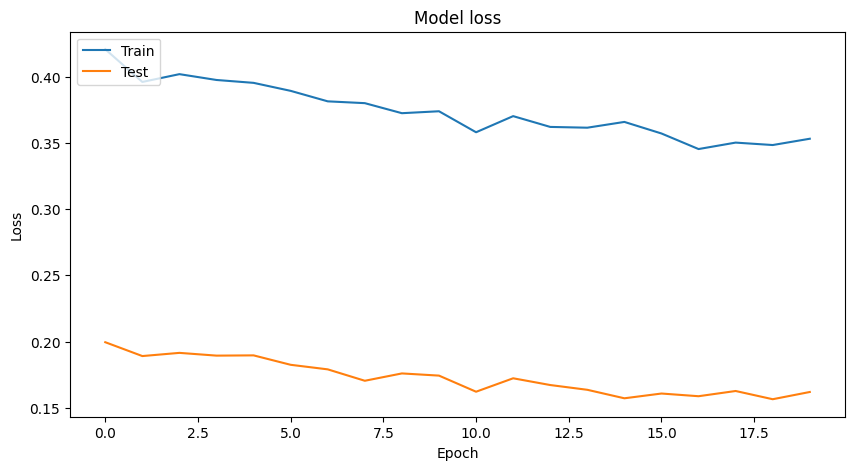

In [14]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [15]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [16]:
results_df = pd.DataFrame({
'Predicted': label_encoder.inverse_transform(y_pred_classes),
'Actual': label_encoder.inverse_transform(y_true_classes)
})
print(results_df.head(30))

   Predicted Actual
0          X      T
1          L      L
2          A      A
3          E      E
4          Q      Q
5          E      E
6          O      O
7          Q      Q
8          G      G
9          O      O
10         B      B
11         P      P
12         V      V
13         Q      Q
14         M      M
15         V      V
16         B      B
17         K      K
18         S      S
19         D      D
20         B      B
21         P      P
22         Q      Q
23         O      O
24         W      W
25         Z      Z
26         N      N
27         Q      Q
28         G      G
29         F      F
